In [1]:
word1 = 'првет'
word2 = 'привет'
q = [(word1, word2, 0)]
final = []
while len(q) > 0:
    w1, w2, d = q[0]
    q = q[1:]
    if len(w1) > 1:
        q.append((w1[:-1], w2, d + 1))
    else:
        final.append(f'dist( , {w2}) + {d+1}')
    if len(w2) > 1:
        q.append((w1, w2[:-1], d + 1))
    else:
        final.append(f'dist({w1},  ) +{d+1})')
    if len(w1) > 1 and len(w2) > 1:
        q.append((w1[:-1], w2[:-1], d + (1 if w1[-1] != w2[-1] else 0)))
    else:
        final.append(f'dist({w1[:-1]}, {w2[:-1]}) +{d+(1 if w1[-1] != w2[-1] else 0)})')
final

['dist( , привет) + 5',
 'dist(, приве) +5)',
 'dist( , приве) + 5',
 'dist(, прив) +5)',
 'dist( , приве) + 5',
 'dist(, прив) +5)',
 'dist( , прив) + 5',
 'dist(, при) +5)',
 'dist( , приве) + 5',
 'dist(, прив) +5)',
 'dist( , прив) + 5',
 'dist(, при) +5)',
 'dist( , прив) + 5',
 'dist(, при) +5)',
 'dist( , при) + 5',
 'dist(, пр) +5)',
 'dist( , приве) + 4',
 'dist(, прив) +4)',
 'dist( , прив) + 4',
 'dist(, при) +4)',
 'dist( , прив) + 4',
 'dist(, при) +4)',
 'dist( , при) + 4',
 'dist(, пр) +4)',
 'dist( , прив) + 3',
 'dist(, при) +3)',
 'dist( , при) + 3',
 'dist(, пр) +3)',
 'dist( , при) + 2',
 'dist(, пр) +2)',
 'dist( , пр) + 2',
 'dist(, п) +2)',
 'dist( , приве) + 6',
 'dist(, прив) +6)',
 'dist( , приве) + 6',
 'dist(, прив) +6)',
 'dist( , прив) + 6',
 'dist(, при) +6)',
 'dist( , прив) + 6',
 'dist(, при) +6)',
 'dist( , приве) + 6',
 'dist(, прив) +6)',
 'dist( , прив) + 6',
 'dist(, при) +6)',
 'dist( , прив) + 6',
 'dist(, при) +6)',
 'dist( , при) + 6',
 'dist(

Можно заметить, что довольно много повторений. В общем то здесь и приходит на помощь динамическое программирование.

In [2]:
word1 = 'мвтемаатка'
word2 = 'математика'
col_labels=['#'] + list(word1)
row_labels= ['#'] + list(word2)
table_vals= [[0 for i in range(len(col_labels))] for j in range(len(row_labels))]
# Edit distance initialization
for i in range(len(row_labels)):
    table_vals[i][0] = i
for i in range(len(col_labels)):
    table_vals[0][i] = i
print(col_labels)
print(row_labels)

['#', 'м', 'в', 'т', 'е', 'м', 'а', 'а', 'т', 'к', 'а']
['#', 'м', 'а', 'т', 'е', 'м', 'а', 'т', 'и', 'к', 'а']


Заведем специальную табличку table_vals, в которой будем запоминать посчитанные расстояния

In [3]:
for i in range(1, len(row_labels)):
    for j in range(1, len(col_labels)):
        table_vals[i][j] = min(table_vals[i - 1][j - 1] + (1 if row_labels[i] != col_labels[j] else 0), # 
                               table_vals[i][j - 1] + 1, 
                               table_vals[i - 1][j] + 1)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = [11,11]

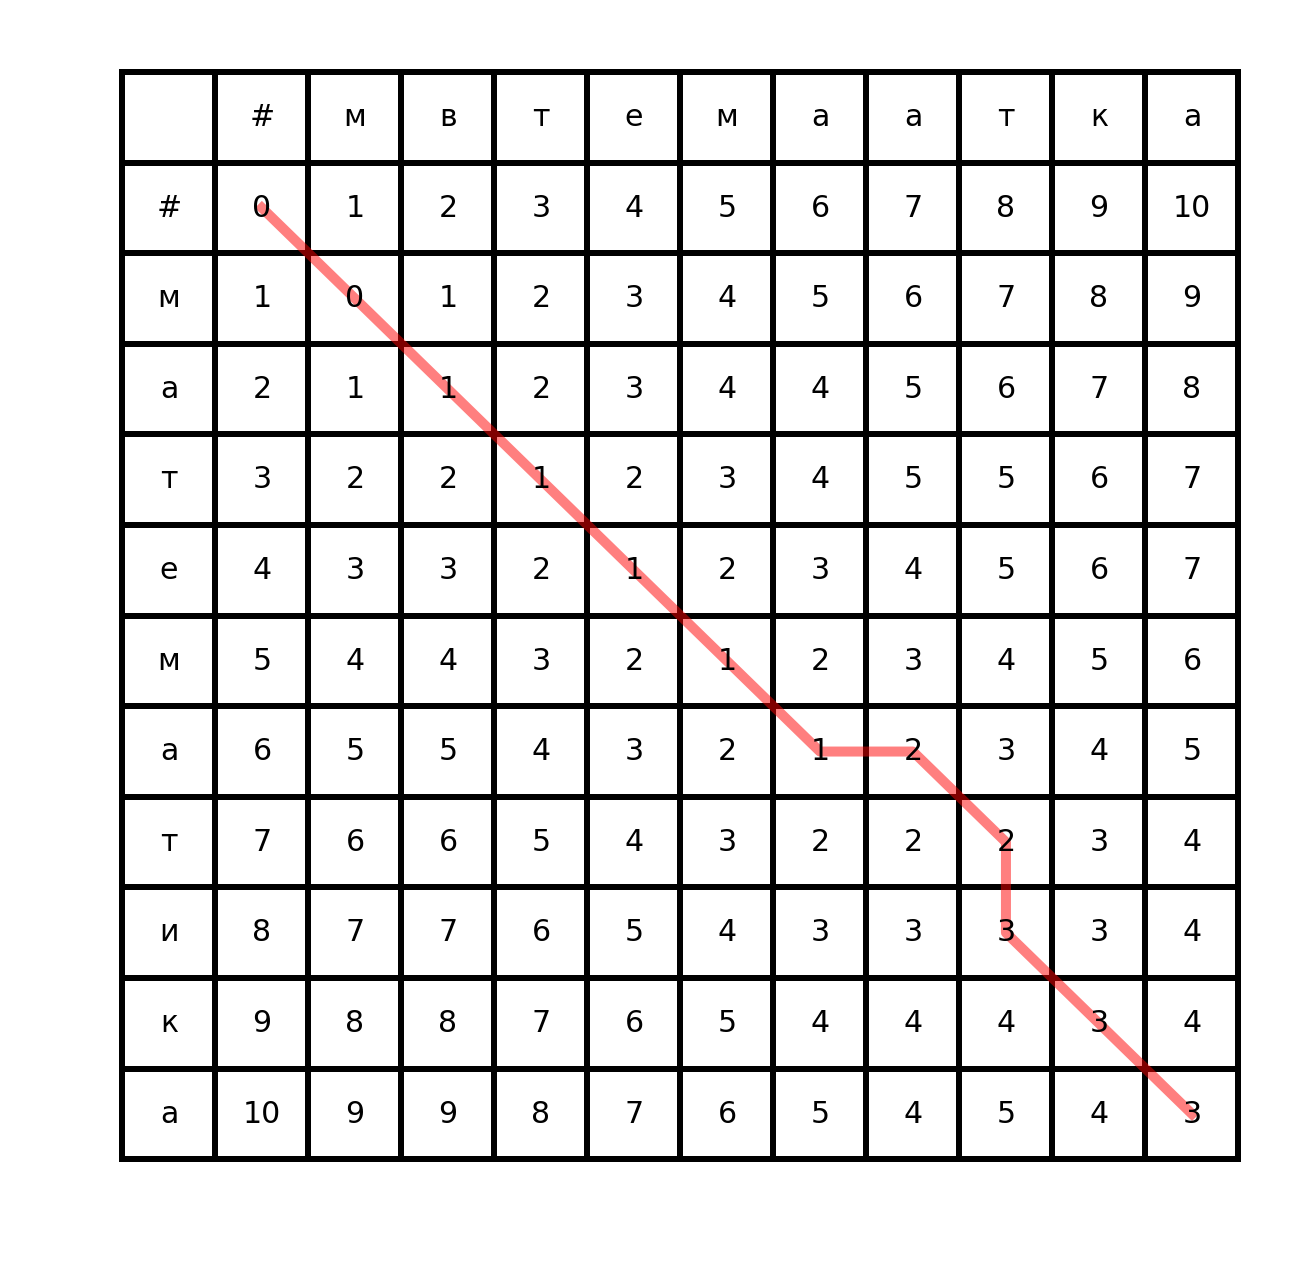

In [6]:
import numpy as np
def draw_table(col_labels, row_labels, table_vals, line=None):
    if not line is None:
        line = np.array(line)
        line = line.transpose()

    ncol = len(col_labels)
    nrow = len(row_labels)

    # draw grid lines
    plt.plot(np.tile([0, ncol+1], (nrow+2,1)).T, np.tile(np.arange(nrow+2), (2,1)),
        'k', linewidth=3)
    plt.plot(np.tile(np.arange(ncol+2), (2,1)), np.tile([0, nrow+1], (ncol+2,1)).T,
        'k', linewidth=3)

    # plot labels
    for icol, col in enumerate(col_labels):
        plt.text(icol + 1.5, nrow + 0.5, col, ha='center', va='center')
    for irow, row in enumerate(row_labels):
        plt.text(0.5, nrow - irow - 0.5, row, ha='center', va='center')

    # plot table content
    for irow, row in enumerate(table_vals):
        for icol, cell in enumerate(row):
            plt.text(icol + 1.5, nrow - irow - 0.5, cell, ha='center', va='center')

    # plot line
    if not line is None:
        plt.plot(line[0] + 1.5, nrow - line[1] - 0.5, 'r', linewidth = 5, alpha = 0.5)

    #plt.axis([-0.5, ncol + 1.5, -0.5, nrow+1.5])
    plt.axis('off')
    plt.show()
    
n = len(row_labels) - 1
m = len(col_labels) - 1
line = [[m, n]]
while(n > 0 or m > 0):
    if n > 0 and table_vals[n][m] == table_vals[n - 1][m] + 1:
        n -= 1
    elif m > 0 and table_vals[n][m] == table_vals[n][m - 1] + 1:
        m -= 1
    else:
        n -= 1
        m -= 1
    line.append([m, n])
draw_table(col_labels, row_labels, table_vals, line)

In [7]:
result = []
for i in range(len(line) - 1):
    x, y = line[i]
    prev_x, prev_y = line[i + 1]
    print(x, y, prev_x, prev_y)
    if (x == prev_x + 1) and (y == prev_y + 1):
        result.append(f'S({col_labels[x]}->{row_labels[y]})' if col_labels[x] != row_labels[y] else 'C')
    elif x == prev_x + 1:
        result.append(f'D')
    else:
        result.append(f'I({row_labels[y]})')
result = list(reversed(result))
result

10 10 9 9
9 9 8 8
8 8 8 7
8 7 7 6
7 6 6 6
6 6 5 5
5 5 4 4
4 4 3 3
3 3 2 2
2 2 1 1
1 1 0 0


['C', 'S(в->а)', 'C', 'C', 'C', 'C', 'D', 'C', 'I(и)', 'C', 'C']

In [8]:
pref = ''
suff = word1
print(suff)
for i in range(len(result)):
    if result[i] == 'D':
        #print('Уделение')
        suff = suff[1:]
        print(pref + suff)
    elif result[i][0] == 'I':
        pref = pref + result[i][2]
        #print('Вставка')
        print(pref + suff)
    elif result[i][0] == 'S':
        #print('Замена')
        pref = pref + result[i][5]
        suff = suff[1:]
        print(pref + suff)
    else:
        pref = pref + suff[0]
        suff = suff[1:]
        #print(pref + suff)

мвтемаатка
матемаатка
математка
математика


### Сопоставление звука

Окызывается, подобные приемы можно использовать для сопоставления других последовательностей, например для звука.

In [9]:
import os
from src.features import mfcc
import scipy.io.wavfile as wav

In [10]:
etalon_mfcc = {}
for file in os.scandir('etalon'):
    (rate,sig) = wav.read(file.path)
    mfcc_feat = mfcc(sig,rate)
    basename = os.path.basename(file)
    etalon_mfcc[basename] = mfcc_feat

In [11]:
def align(sound, pattern):
    n = sound.shape[0]
    m = pattern.shape[0]
    table = np.full((n + 1, m + 1), float('inf'))
    table[0,:] = np.zeros((m + 1))
    #print(table.shape)
    for i in range(n):
        for j in range(m):
            table[i + 1][j + 1] = min(
                table[i + 1][j],
                table[i][j + 1] + np.linalg.norm(sound[i] - pattern[j])
            )
        #table[i + 1][m - 1] = table[i][m - 2] + np.linalg.norm(pattern[i] - sound[m - 1])
    #print(table)
    return table[n][m]
align(etalon_mfcc['da_01.wav'], etalon_mfcc['net_01.wav'])

6811.320329562345

In [12]:
for file in os.scandir('test'):
    (rate,sig) = wav.read(file.path)
    mfcc_feat = mfcc(sig,rate)
    basename = os.path.basename(file)
    best_match = min([(align(mfcc_feat, y), x) for x, y in etalon_mfcc.items()])
    print(basename, best_match)

da_07.wav (3977.921323837533, 'da_04.wav')


net_18.wav (4148.675227207454, 'net_05.wav')


net_11.wav (4755.829579706055, 'net_04.wav')


da_09.wav (5787.196448976855, 'da_01.wav')


net_16.wav (4236.853820938949, 'net_04.wav')


net_07.wav (4204.966817325966, 'net_05.wav')


da_18.wav (5505.950974998517, 'da_03.wav')


da_11.wav (5614.25895413816, 'da_01.wav')


net_09.wav (5146.074283424581, 'net_05.wav')


da_16.wav (3479.544624326734, 'da_03.wav')


da_08.wav (3580.3901037298738, 'da_05.wav')


net_17.wav (5348.043269844684, 'net_05.wav')


net_10.wav (3414.84779363582, 'net_02.wav')


da_06.wav (3690.874419348393, 'da_05.wav')


net_19.wav (6188.822757869163, 'net_05.wav')


net_08.wav (4187.2468722820195, 'net_05.wav')


da_17.wav (3801.6348518497516, 'da_03.wav')


da_10.wav (3907.371802443785, 'da_01.wav')


net_06.wav (3230.1954339591057, 'net_05.wav')


da_19.wav (4734.713653958389, 'da_05.wav')


da_13.wav (4677.843690422335, 'da_03.wav')


da_14.wav (3540.9036865721005, 'da_03.wav')


net_13.wav (5367.964102559389, 'net_04.wav')


In [0]:
import IPython

In [0]:
IPython.display.Audio("etalon/net_03.wav")

In [0]:
IPython.display.Audio("etalon/net_01.wav")

In [0]:
IPython.display.Audio("etalon/net_02.wav")